In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset= pd.read_csv("../datasets/diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# shape of the dataset
rows_shape = dataset.shape[0]
columns_shape = dataset.shape[1]
print(f"The number of rows: {rows_shape} | number of columns: {columns_shape}")

The number of rows: 768 | number of columns: 9


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
bloodpressure = dataset[dataset["BloodPressure"] > 100]
bloodpressure

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9,171,110,24,240,45.4,0.721,54,1
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0
177,0,129,110,46,130,67.1,0.319,26,1
207,5,162,104,0,0,37.7,0.151,52,1
362,5,103,108,37,0,39.2,0.305,65,0
369,1,133,102,28,140,32.8,0.234,45,1
440,0,189,104,25,0,34.3,0.435,41,1
549,4,189,110,31,0,28.5,0.680,37,0
658,11,127,106,0,0,39.0,0.190,51,0


<Axes: xlabel='BloodPressure', ylabel='Count'>

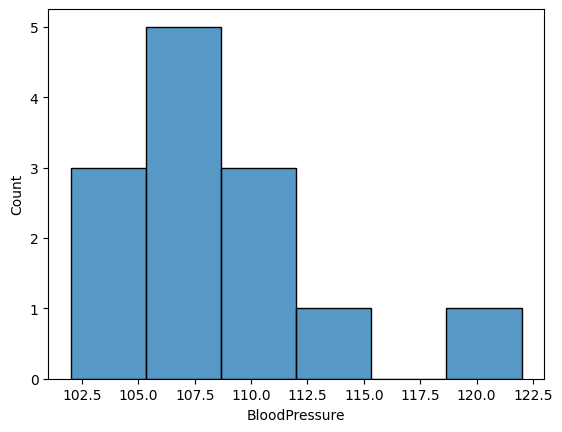

In [6]:
sns.histplot(bloodpressure,x='BloodPressure')

In [7]:
dataset_describe = dataset.describe().transpose()

In [8]:
dataset_describe

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
# Here we are checking the NAN or null or missing values in the dataset
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Then we check the dublicates in the dataset
dataset[dataset.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


# Analysing the data

## Comparing the Pregnancies

In [11]:
# First cheking the number of pregnant girls with diabities and number of non pregnannt girl with diabities

grouped_data_pregnancy= dataset.groupby(['Outcome','Pregnancies'])['Pregnancies'].count()
# Here outcome 0 means that the women is note pregnaant nad 1 means she is pregnant
# dataset[dataset['Pregnancies'] == 1]['Pregnancies']
grouped_data_pregnancy

pivot_table_pregnancies = pd.pivot_table(data=dataset,values='Pregnancies',index='Outcome',aggfunc='mean')
pivot_table_pregnancies

,Pregnancies
Outcome,
0,3.298000
1,4.865672


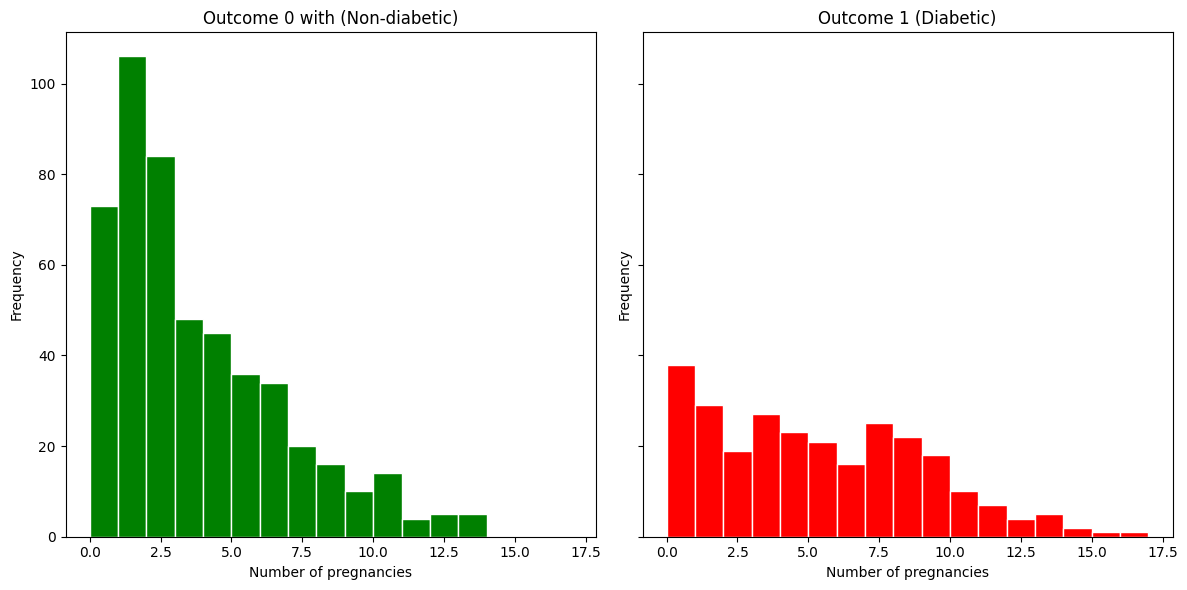

In [12]:
import matplotlib.pyplot as plt

outcome_0 = dataset[dataset["Outcome"] == 0]["Pregnancies"]
outcome_1 = dataset[dataset["Outcome"] == 1]["Pregnancies"]

fig , axes = plt.subplots(1,2,figsize=(12,6),sharey=True)

# Outcome zero
axes[0].hist(outcome_0,bins=range(int(dataset['Pregnancies'].max()) + 1),color='green',edgecolor='white')
axes[0].set_title('Outcome 0 with (Non-diabetic)')
axes[0].set_xlabel('Number of pregnancies')
axes[0].set_ylabel('Frequency')

# Outcome one
axes[1].hist(outcome_1,bins=range(int(dataset['Pregnancies'].max()) + 1), color="red",edgecolor="white")
axes[1].set_title('Outcome 1 (Diabetic)')
axes[1].set_xlabel('Number of pregnancies')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Comparing Glucose Level

In [13]:
min_glucose_level = dataset['Glucose'].min()
max_glucose_level = dataset['Glucose'].max()

print(f"The minumum glucose level is : {min_glucose_level}")
print(f"The maximum glucose level is : {max_glucose_level}")

The minumum glucose level is : 0
The maximum glucose level is : 199


In [14]:
# This shows the average glucose level of the person who has diabetites and the person who does not have diabities
pivot_glucose = pd.pivot_table(dataset,values='Glucose',index='Outcome',aggfunc='mean')
pivot_glucose

,Glucose
Outcome,
0,109.980000
1,141.257463


In [15]:
# Histogram of glucose level
glucose_outcome_zero = dataset[dataset['Outcome'] == 0]['Glucose']
glucose_outcome_one = dataset[dataset['Outcome'] == 1]['Glucose']

glucose_outcome_zero,glucose_outcome_one

(1       85
 3       89
 5      116
 7      115
 10     110
       ... 
 762     89
 763    101
 764    122
 765    121
 767     93
 Name: Glucose, Length: 500, dtype: int64,
 0      148
 2      183
 4      137
 6       78
 8      197
       ... 
 755    128
 757    123
 759    190
 761    170
 766    126
 Name: Glucose, Length: 268, dtype: int64)

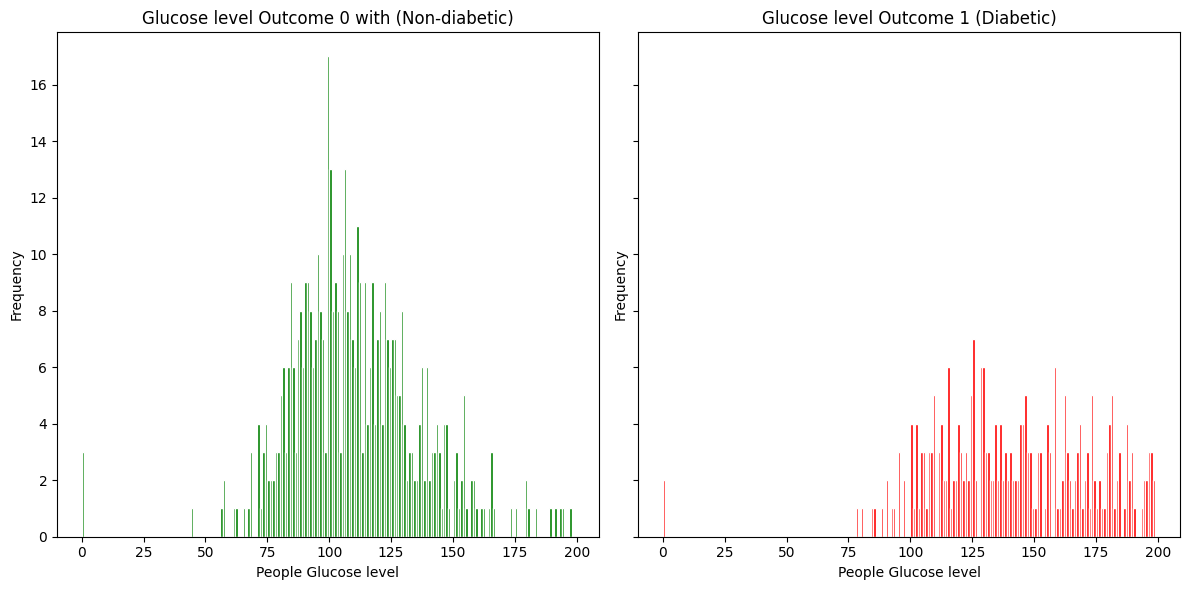

In [16]:
import matplotlib.pyplot as plt

glucose_outcome_0 = dataset[dataset["Outcome"] == 0]["Glucose"]
glucose_outcome_1 = dataset[dataset["Outcome"] == 1]["Glucose"]

fig , axes = plt.subplots(1,2,figsize=(12,6),sharey=True)

# Outcome zero
axes[0].hist(glucose_outcome_0,bins=range(int(dataset['Glucose'].max()) + 1),color='green',edgecolor='white')
axes[0].set_title('Glucose level Outcome 0 with (Non-diabetic)')
axes[0].set_xlabel('People Glucose level')
axes[0].set_ylabel('Frequency')

# Outcome one
axes[1].hist(glucose_outcome_1,bins=range(int(dataset['Glucose'].max()) + 1), color="red",edgecolor="white")
axes[1].set_title('Glucose level Outcome 1 (Diabetic)')
axes[1].set_xlabel('People Glucose level')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


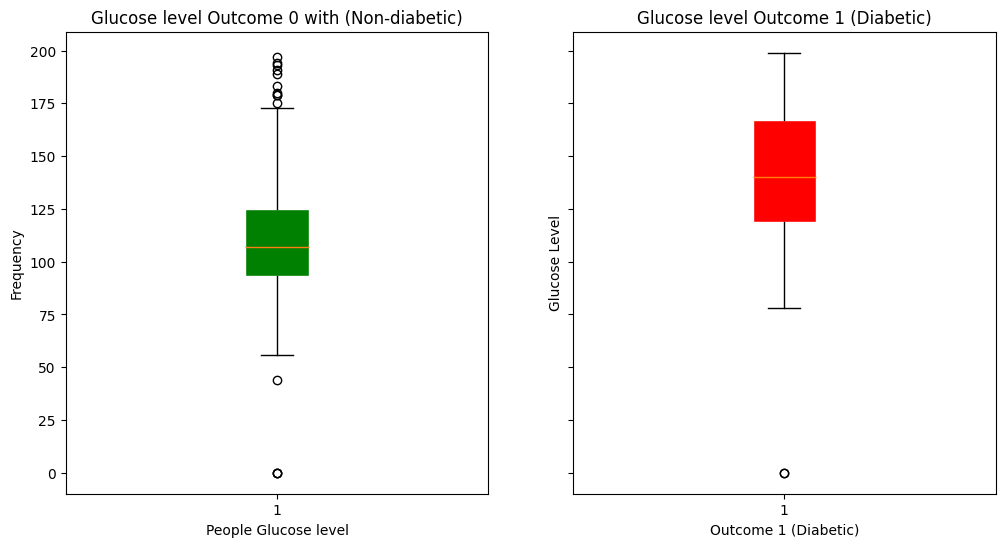

In [18]:
import matplotlib.pyplot as plt

fig , axes = plt.subplots(1,2,figsize=(12,6),sharey=True)

axes[0].boxplot(glucose_outcome_0, patch_artist=True, boxprops=dict(facecolor='green', color='white'))
axes[0].set_title('Glucose level Outcome 0 with (Non-diabetic)')
axes[0].set_xlabel('People Glucose level')
axes[0].set_ylabel('Frequency')



axes[1].boxplot(glucose_outcome_1, patch_artist=True, boxprops=dict(facecolor='red', color='white'))
axes[1].set_title('Glucose level Outcome 1 (Diabetic)')
axes[1].set_xlabel('Outcome 1 (Diabetic)')
axes[1].set_ylabel('Glucose Level')

plt.show()

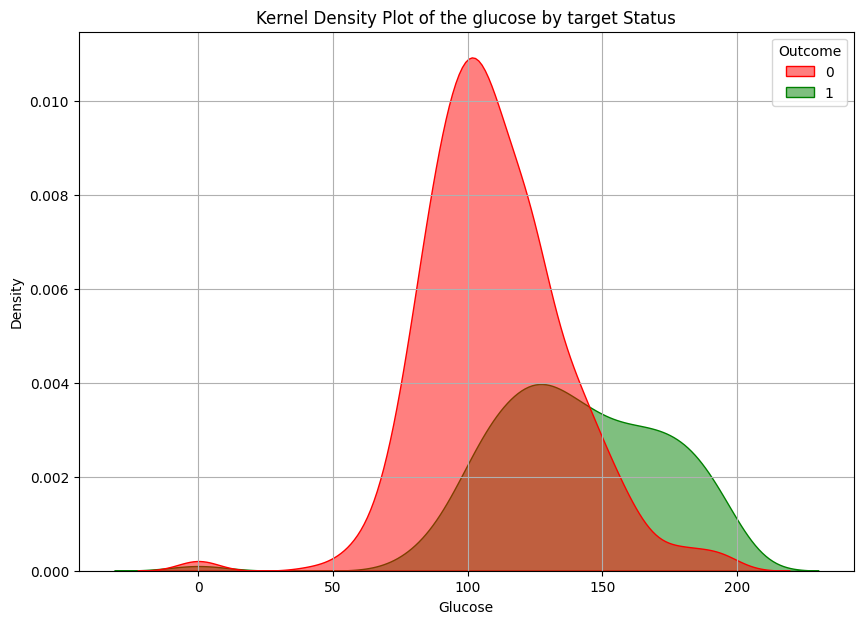

In [23]:
# Showing in Kernel Density Plot

plt.figure(figsize=(10,7))

sns.kdeplot(data=dataset,x="Glucose",hue="Outcome",fill=True,alpha=0.5,palette={1:'green',0:'red'})
plt.title('Kernel Density Plot of the glucose by target Status')
plt.grid()
plt.show()

### Outcomes 
* The Non-Diabetic group (Outcome 0) has a strong peak around 100 mg/dL of glucose, indicating that most non-diabetic individuals have glucose levels centered around this value.
* The Diabetic group (Outcome 1) shows a broader distribution with a peak around 150 mg/dL, and the values spread further toward higher glucose levels (even going beyond 200 mg/dL).
* There's a clear separation between the distributions of glucose levels for the two outcomes. This separation suggests that glucose levels are a strong distinguishing factor between diabetic and non-diabetic   individuals.
*  The diabetic group has a larger proportion of individuals with higher glucose levels, while the non-diabetic group is more concentrated around lower glucose values.
* `Glucose level` is a highly important feature in distinguishing between diabetic and non-diabetic individuals. Higher glucose levels are strongly associated with diabetes.
* The separation between the two distributions indicates that glucose might be a more powerful predictor for diabetes compared to blood pressure (based on the previous KDE plot you provided).

## Comparing the Blood pressure

In [25]:
min_blood_pressure = dataset['BloodPressure'].min()
max_blood_pressure = dataset['BloodPressure'].max()

print(f"The minumum blood pressure is : {min_blood_pressure}")
print(f"The maximum blood pressure is : {max_blood_pressure}")

The minumum blood pressure is : 0
The maximum blood pressure is : 122


In [27]:
# Creating a pivot table of the Blood pressure
blood_pressure_pivot_table = pd.pivot_table(dataset,values="BloodPressure",index="Outcome",aggfunc='mean')
blood_pressure_pivot_table

,BloodPressure
Outcome,
0,68.184000
1,70.824627


Text(0, 0.5, 'Frequency')

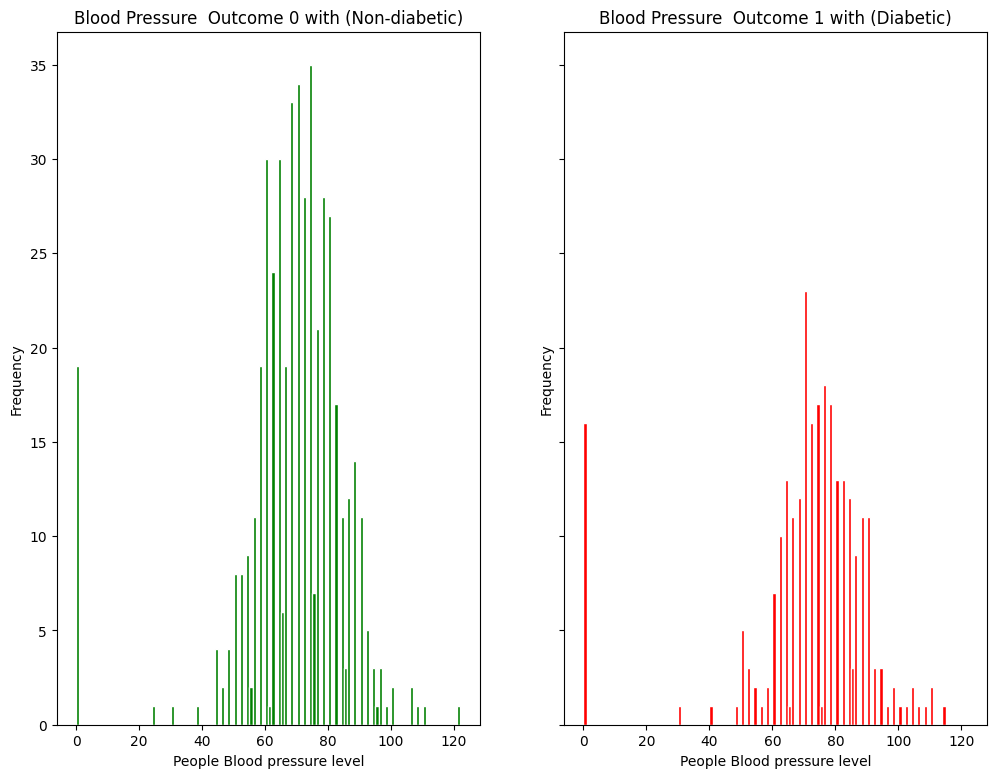

In [38]:
import matplotlib.pyplot as plt


blood_pressure_outcome0 = dataset[dataset['Outcome'] == 0 ]['BloodPressure']
blood_pressure_outcome1 = dataset[dataset['Outcome'] == 1 ]['BloodPressure']

fig, axes = plt.subplots(1,2,figsize=(12,9),sharey=True)


axes[0].hist(blood_pressure_outcome0,bins=range(int(dataset['BloodPressure'].max()) + 1),color='green',edgecolor='white')
axes[0].set_title('Blood Pressure  Outcome 0 with (Non-diabetic)')
axes[0].set_xlabel('People Blood pressure level')
axes[0].set_ylabel('Frequency')

axes[1].hist(blood_pressure_outcome1,bins=range(int(dataset['BloodPressure'].max()) + 1),color='red',edgecolor='white')
axes[1].set_title('Blood Pressure  Outcome 1 with (Diabetic)')
axes[1].set_xlabel('People Blood pressure level')
axes[1].set_ylabel('Frequency')

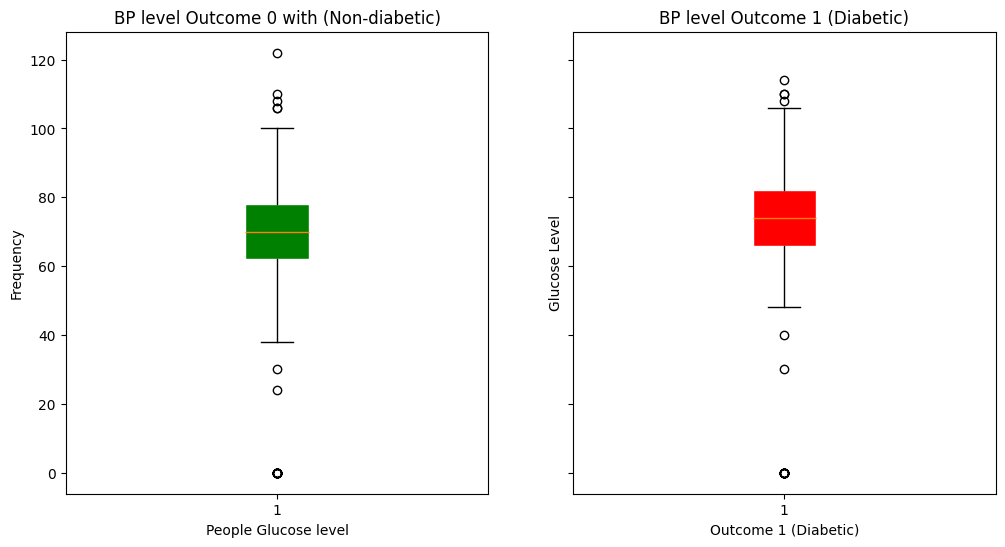

In [39]:
import matplotlib.pyplot as plt

fig , axes = plt.subplots(1,2,figsize=(12,6),sharey=True)

axes[0].boxplot(blood_pressure_outcome0, patch_artist=True, boxprops=dict(facecolor='green', color='white'))
axes[0].set_title('BP level Outcome 0 with (Non-diabetic)')
axes[0].set_xlabel('People Glucose level')
axes[0].set_ylabel('Frequency')



axes[1].boxplot(blood_pressure_outcome1, patch_artist=True, boxprops=dict(facecolor='red', color='white'))
axes[1].set_title('BP level Outcome 1 (Diabetic)')
axes[1].set_xlabel('Outcome 1 (Diabetic)')
axes[1].set_ylabel('Glucose Level')

plt.show()

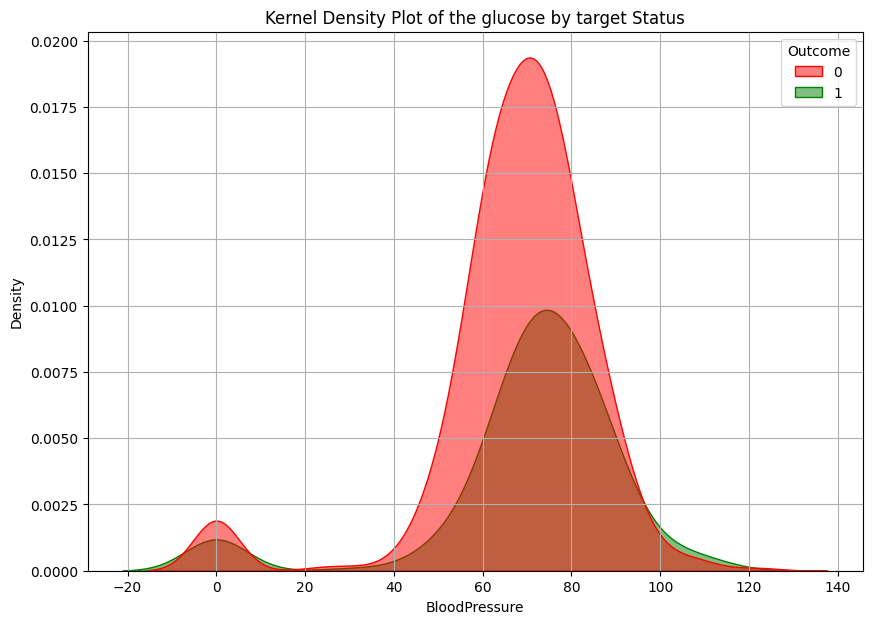

In [40]:
# Showing in Kernel Density Plot

plt.figure(figsize=(10,7))

sns.kdeplot(data=dataset,x="BloodPressure",hue="Outcome",fill=True,alpha=0.5,palette={1:'green',0:'red'})
plt.title('Kernel Density Plot of the glucose by target Status')
plt.grid()
plt.show()

### Outcomes
* There's a significant overlap between the distributions of blood pressure for both outcomes. This suggests that blood pressure alone may not be a highly distinctive feature for differentiating between diabetic and non-diabetic individuals, as both groups show similar ranges.
* The peak of the distribution for Outcome 0 (Non-Diabetic) is slightly higher compared to Outcome 1, suggesting that non-diabetic individuals have a higher concentration of blood pressure values around the 70-80 range.
* Diabetic individuals (green) have a relatively flatter and lower peak, indicating more spread or variability in their blood pressure values.
* Blood pressure values for both diabetic and non-diabetic individuals are centered around similar ranges, although non-diabetic individuals tend to have slightly higher densities.
* This plot alone suggests that blood pressure may not be the best single feature for distinguishing between diabetic and non-diabetic individuals. However, in combination with other features, it might still contribute to model performance.